In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [60]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
def null_analysis(df):
  '''
  desc: get nulls for each column in counts & percentages
  arg: dataframe
  return: dataframe
  '''
  null_cnt = df.isnull().sum() # calculate null counts
  null_cnt = null_cnt[null_cnt!=0] # remove non-null cols
  null_percent = null_cnt / len(df) * 100 # calculate null percentages
  null_table = pd.concat([pd.DataFrame(null_cnt), pd.DataFrame(null_percent)], axis=1)
  null_table.columns = ['counts', 'percentage']
  null_table.sort_values('counts', ascending=False, inplace=True)
  return null_table


In [63]:
null_analysis(df)

,counts,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [65]:
df_cleaned = df.dropna()
df_cleaned.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [66]:
null_analysis(df_cleaned)

,counts,percentage


In [9]:
def null_threshold(df, threshold=25):
  '''
  desc: delete columns based on a null percentage threshold
  arg: df=dataframe; threshold=percentage of nulls in column
  return: dataframe
  '''
  null_table = null_analysis(df)
  null_table = null_table[null_table['percentage']>=25]
  df.drop(null_table.index, axis=1, inplace = True)
  return df

In [68]:
df=df_cleaned

In [70]:
df=df.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1)

In [71]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
print(df)


     Survived  Pclass  Sex   Age  SibSp  Parch
1           1       1    0  38.0      1      0
3           1       1    0  35.0      1      0
6           0       1    1  54.0      0      0
10          1       3    0   4.0      1      1
11          1       1    0  58.0      0      0
..        ...     ...  ...   ...    ...    ...
871         1       1    0  47.0      1      1
872         0       1    1  33.0      0      0
879         1       1    0  56.0      0      1
887         1       1    0  19.0      0      0
889         1       1    1  26.0      0      0

[183 rows x 6 columns]


In [72]:
correlation_matrix = df.corr()


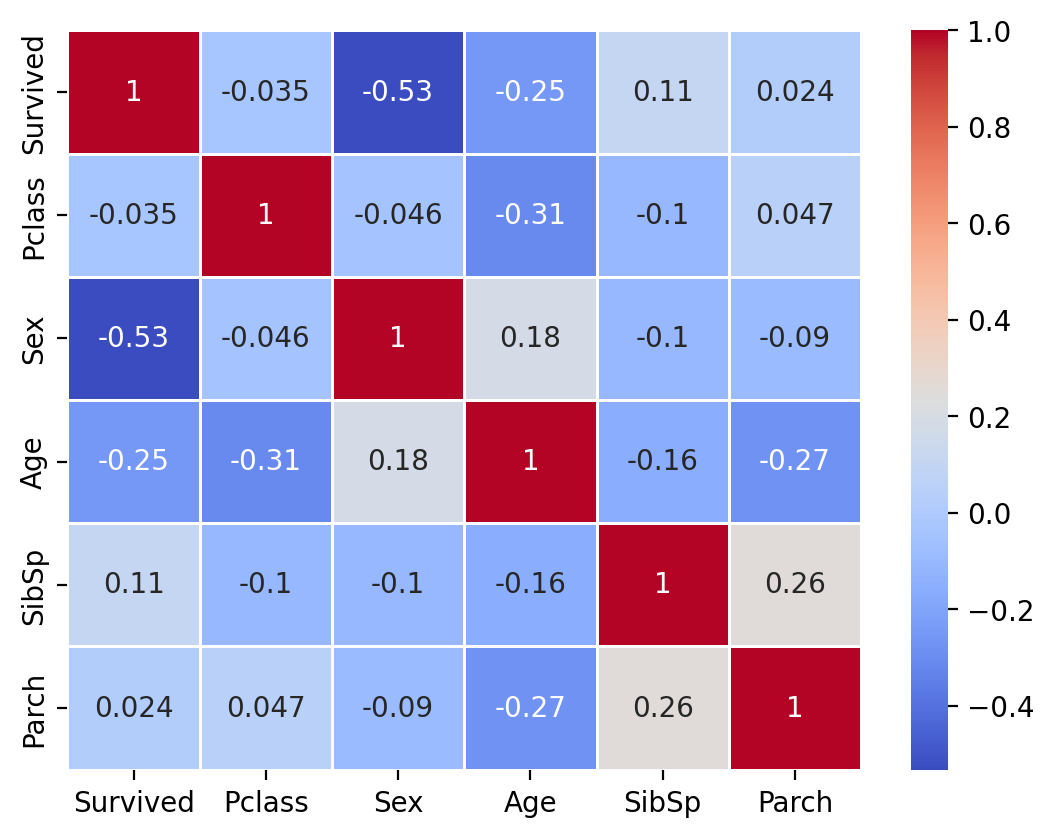

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

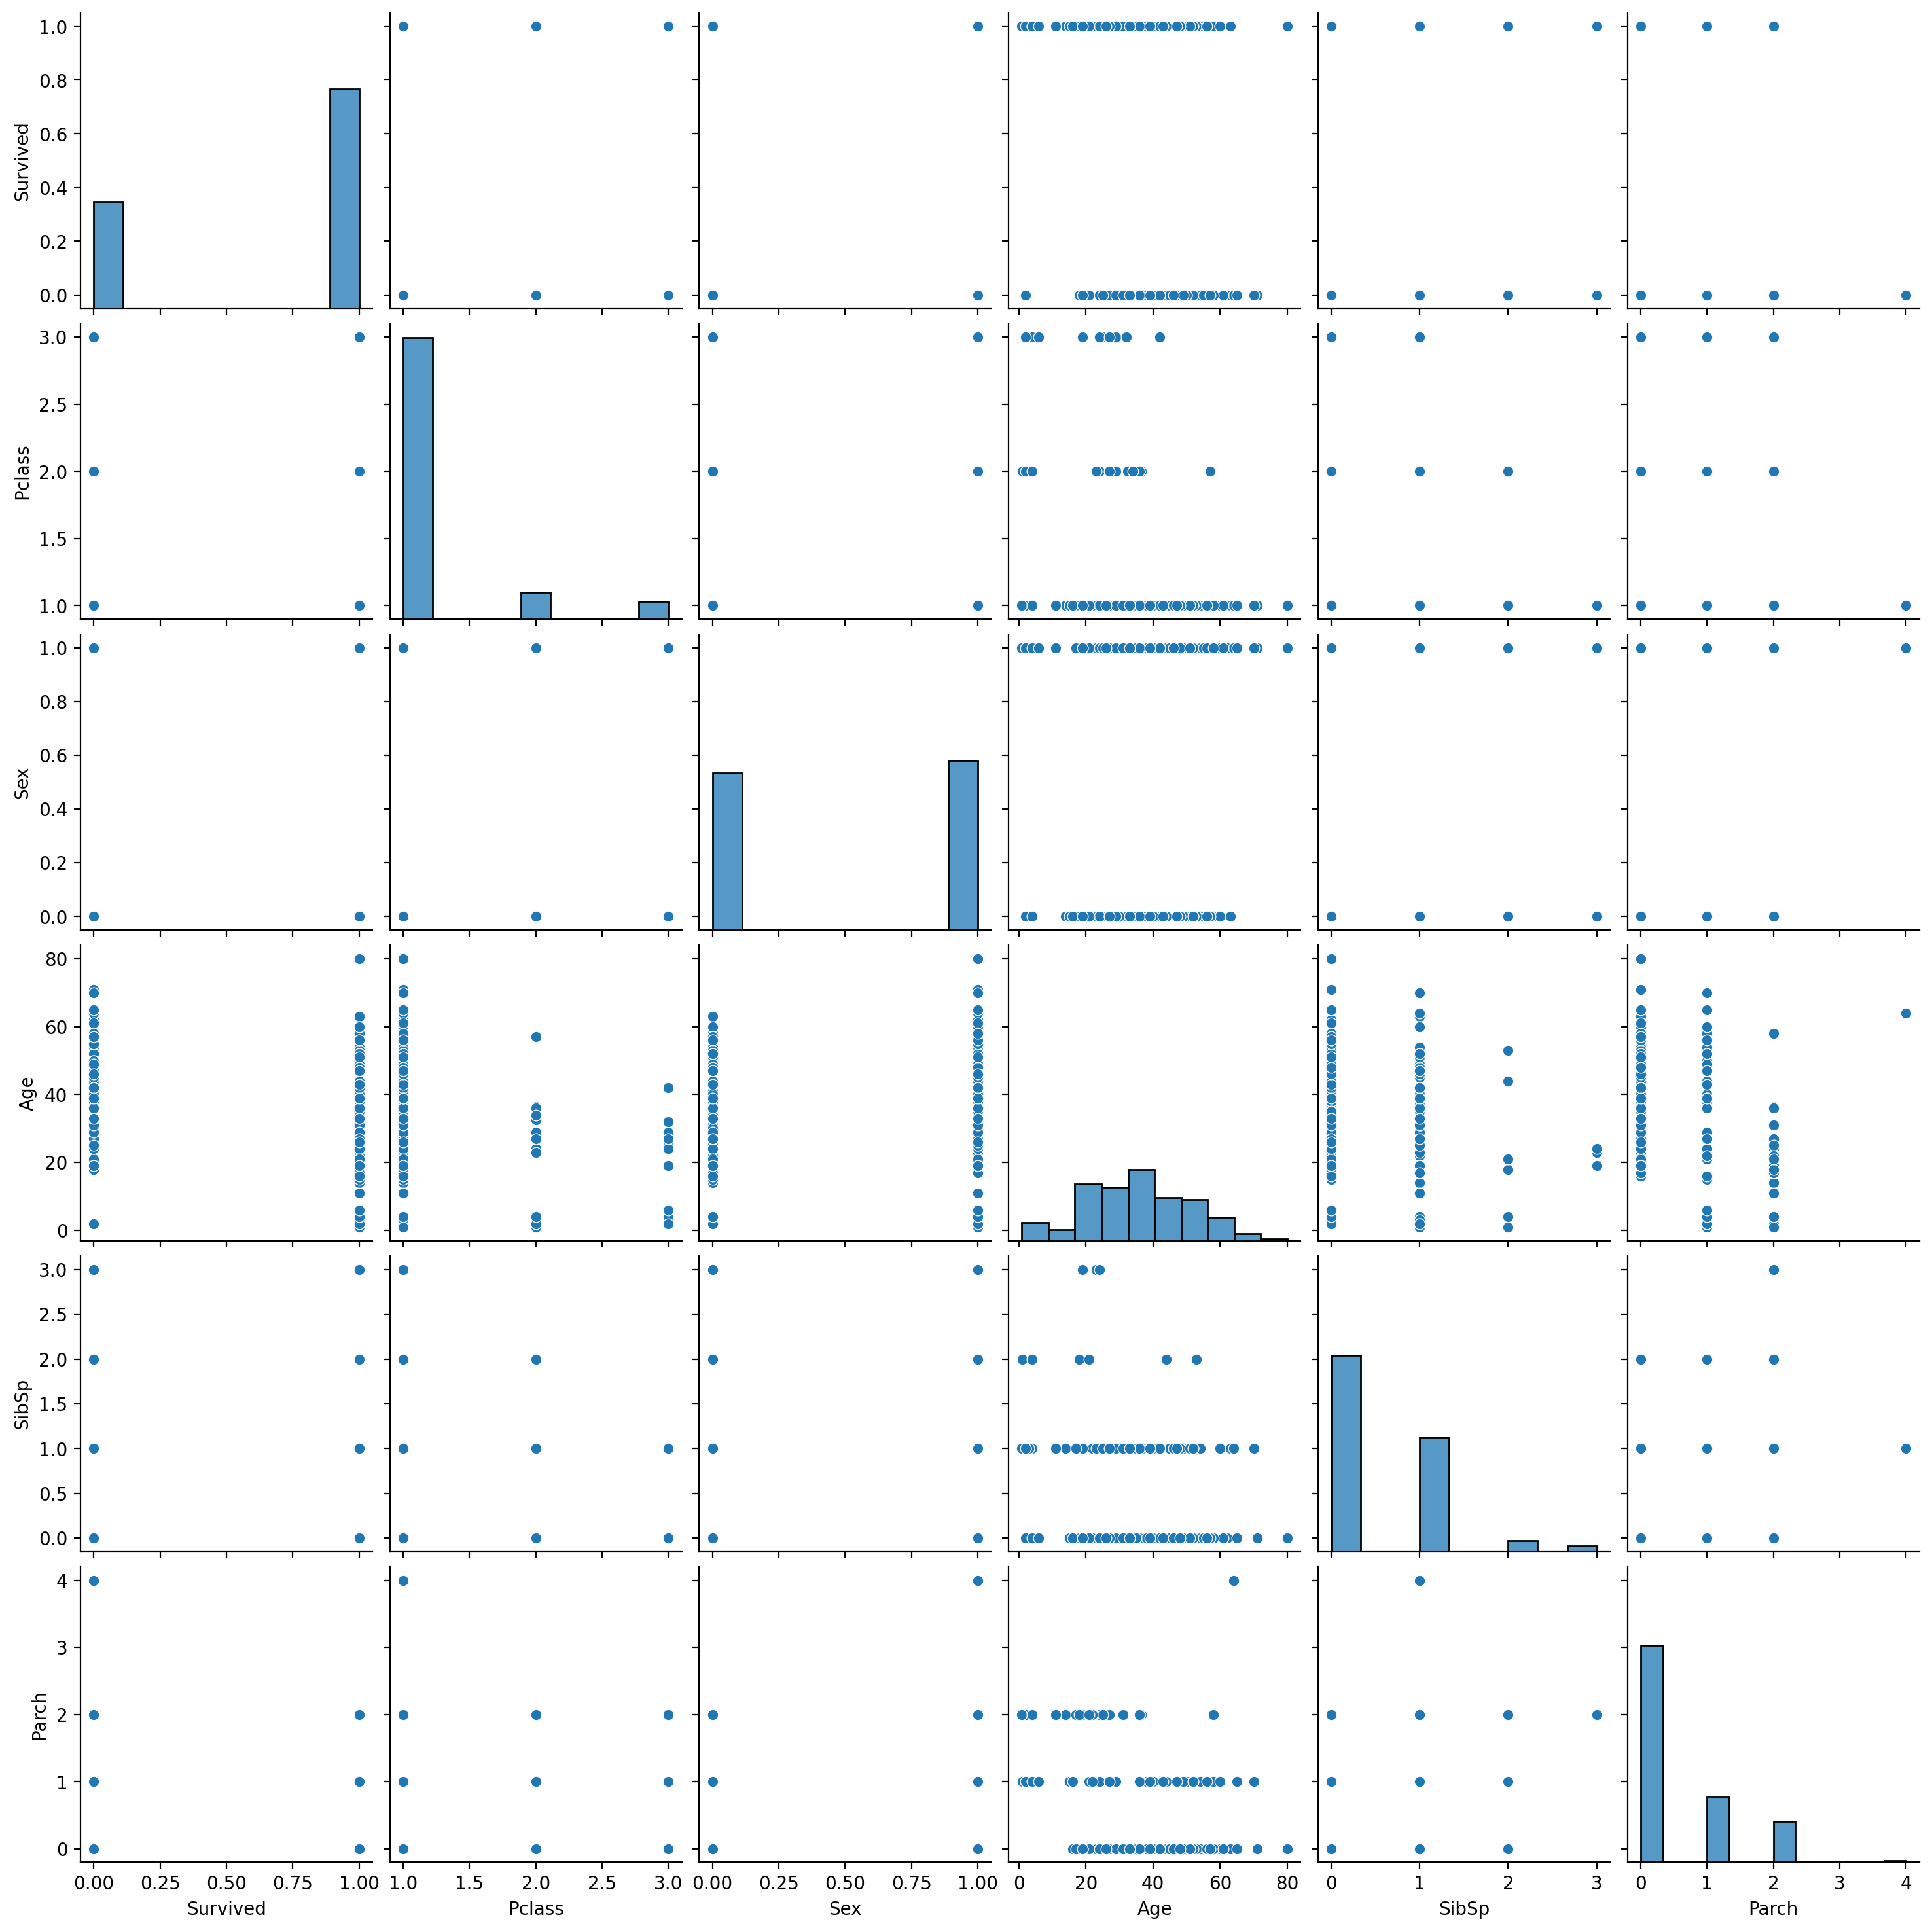

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df = ...

# Create a pair plot
sns.pairplot(df)
plt.show()


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [76]:


# Split the data into features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))

Accuracy: 0.8108108108108109
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.81      0.91      0.86        23

    accuracy                           0.81        37
   macro avg       0.81      0.78      0.79        37
weighted avg       0.81      0.81      0.81        37



In [79]:
# Create a Random Forest model (Classifier or Regressor depending on the problem)
model = RandomForestClassifier()  # or RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)  # or mean_squared_error for regression
print(f'Accuracy: {accuracy}')


Accuracy: 0.7567567567567568


In [83]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
model = SVC(kernel='linear', C=1.0)  # Linear kernel, you can try other kernels like 'rbf' or 'poly'

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, predictions))


Accuracy: 0.7837837837837838
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.83      0.83      0.83        23

    accuracy                           0.78        37
   macro avg       0.77      0.77      0.77        37
weighted avg       0.78      0.78      0.78        37

